In [1]:
# pip install keras

In [2]:
# pip install tensorflow

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("pima-indians-diabetes.csv",header=None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
dataset=df.to_numpy()
dataset.shape

(768, 9)

In [6]:
X=dataset[:,:-1]
y=dataset[:,-1]
print(X[0:5])
print(y[0:5])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]
[1. 0. 1. 0. 1.]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)

(614, 8)
(614,)


In [8]:
# model=Sequential()
# model.add(Dense(3, input_dim= 2 , activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))
# print(model.summary())

In [9]:
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train, epochs=300, batch_size=20, validation_split=0.1, callbacks=[es,mc])

Epoch 1/300
28/28 [==============================] - 3s 72ms/step - loss: 6.2274 - accuracy: 0.5361 - val_loss: 2.6494 - val_accuracy: 0.4516
Epoch 2/300
28/28 [==============================] - 0s 5ms/step - loss: 2.3453 - accuracy: 0.5270 - val_loss: 1.4332 - val_accuracy: 0.4839
Epoch 3/300
28/28 [==============================] - 0s 5ms/step - loss: 1.3901 - accuracy: 0.5183 - val_loss: 1.2056 - val_accuracy: 0.5323
Epoch 4/300
28/28 [==============================] - 0s 6ms/step - loss: 1.0117 - accuracy: 0.5416 - val_loss: 1.0446 - val_accuracy: 0.4194
Epoch 5/300
28/28 [==============================] - 0s 5ms/step - loss: 1.0681 - accuracy: 0.4602 - val_loss: 0.9015 - val_accuracy: 0.6290
Epoch 6/300
28/28 [==============================] - 0s 5ms/step - loss: 0.8500 - accuracy: 0.5887 - val_loss: 0.6758 - val_accuracy: 0.6129
Epoch 7/300
28/28 [==============================] - 0s 5ms/step - loss: 0.7653 - accuracy: 0.6134 - val_loss: 0.6674 - val_accuracy: 0.6290
Epoch 8/300


28/28 [==============================] - 0s 8ms/step - loss: 0.5639 - accuracy: 0.7167 - val_loss: 0.5662 - val_accuracy: 0.6290
Epoch 59/300
28/28 [==============================] - 0s 7ms/step - loss: 0.5473 - accuracy: 0.7370 - val_loss: 0.6203 - val_accuracy: 0.6613
Epoch 60/300
28/28 [==============================] - 0s 7ms/step - loss: 0.5777 - accuracy: 0.6957 - val_loss: 0.5561 - val_accuracy: 0.7419
Epoch 61/300
28/28 [==============================] - 0s 7ms/step - loss: 0.5631 - accuracy: 0.7277 - val_loss: 0.6033 - val_accuracy: 0.6613
Epoch 62/300
28/28 [==============================] - 0s 7ms/step - loss: 0.5525 - accuracy: 0.7108 - val_loss: 0.5798 - val_accuracy: 0.6774
Epoch 63/300
28/28 [==============================] - 0s 7ms/step - loss: 0.5780 - accuracy: 0.7243 - val_loss: 0.5671 - val_accuracy: 0.6774
Epoch 64/300
28/28 [==============================] - 0s 6ms/step - loss: 0.5823 - accuracy: 0.6667 - val_loss: 0.5563 - val_accuracy: 0.7581
Epoch 65/300
28/28 

Epoch 116/300
28/28 [==============================] - 0s 5ms/step - loss: 0.5240 - accuracy: 0.7333 - val_loss: 0.4991 - val_accuracy: 0.7903
Epoch 117/300
28/28 [==============================] - 0s 6ms/step - loss: 0.4958 - accuracy: 0.7560 - val_loss: 0.5014 - val_accuracy: 0.7581
Epoch 118/300
28/28 [==============================] - 0s 5ms/step - loss: 0.5001 - accuracy: 0.7604 - val_loss: 0.5029 - val_accuracy: 0.7742
Epoch 119/300
28/28 [==============================] - 0s 4ms/step - loss: 0.4967 - accuracy: 0.7739 - val_loss: 0.5162 - val_accuracy: 0.7097
Epoch 120/300
28/28 [==============================] - 0s 6ms/step - loss: 0.5067 - accuracy: 0.7498 - val_loss: 0.5053 - val_accuracy: 0.7419
Epoch 121/300
28/28 [==============================] - 0s 5ms/step - loss: 0.5440 - accuracy: 0.7133 - val_loss: 0.5274 - val_accuracy: 0.6774
Epoch 122/300
28/28 [==============================] - 0s 6ms/step - loss: 0.5106 - accuracy: 0.7393 - val_loss: 0.5390 - val_accuracy: 0.6774

28/28 [==============================] - 0s 5ms/step - loss: 0.4896 - accuracy: 0.7318 - val_loss: 0.4855 - val_accuracy: 0.7419
Epoch 174/300
28/28 [==============================] - 0s 5ms/step - loss: 0.5125 - accuracy: 0.7699 - val_loss: 0.4973 - val_accuracy: 0.7097
Epoch 175/300
28/28 [==============================] - 0s 5ms/step - loss: 0.4704 - accuracy: 0.7661 - val_loss: 0.5330 - val_accuracy: 0.6613
Epoch 176/300
28/28 [==============================] - 0s 5ms/step - loss: 0.4804 - accuracy: 0.7649 - val_loss: 0.4773 - val_accuracy: 0.7742
Epoch 177/300
28/28 [==============================] - 0s 5ms/step - loss: 0.4899 - accuracy: 0.7732 - val_loss: 0.4949 - val_accuracy: 0.6935
Epoch 178/300
28/28 [==============================] - 0s 6ms/step - loss: 0.4855 - accuracy: 0.7552 - val_loss: 0.4967 - val_accuracy: 0.7258
Epoch 179/300
28/28 [==============================] - 0s 5ms/step - loss: 0.4961 - accuracy: 0.7662 - val_loss: 0.4840 - val_accuracy: 0.7419
Epoch 180/300

28/28 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.7778 - val_loss: 0.4822 - val_accuracy: 0.7581
Epoch 231/300
28/28 [==============================] - 0s 5ms/step - loss: 0.4743 - accuracy: 0.7634 - val_loss: 0.4907 - val_accuracy: 0.7581
Epoch 232/300
28/28 [==============================] - 0s 5ms/step - loss: 0.4760 - accuracy: 0.7642 - val_loss: 0.4705 - val_accuracy: 0.7581
Epoch 233/300
28/28 [==============================] - 0s 6ms/step - loss: 0.4636 - accuracy: 0.7887 - val_loss: 0.4856 - val_accuracy: 0.7581
Epoch 234/300
28/28 [==============================] - 0s 4ms/step - loss: 0.4885 - accuracy: 0.7346 - val_loss: 0.4740 - val_accuracy: 0.7419
Epoch 235/300
28/28 [==============================] - 0s 5ms/step - loss: 0.4491 - accuracy: 0.7816 - val_loss: 0.5149 - val_accuracy: 0.6935
Epoch 236/300
28/28 [==============================] - 0s 5ms/step - loss: 0.4973 - accuracy: 0.7591 - val_loss: 0.4791 - val_accuracy: 0.7581
Epoch 237/300

28/28 [==============================] - 0s 6ms/step - loss: 0.4489 - accuracy: 0.7707 - val_loss: 0.4651 - val_accuracy: 0.7419
Epoch 288/300
28/28 [==============================] - 0s 6ms/step - loss: 0.4583 - accuracy: 0.7752 - val_loss: 0.4818 - val_accuracy: 0.7581
Epoch 289/300
28/28 [==============================] - 0s 6ms/step - loss: 0.4868 - accuracy: 0.7684 - val_loss: 0.5024 - val_accuracy: 0.7258
Epoch 290/300
28/28 [==============================] - 0s 6ms/step - loss: 0.4799 - accuracy: 0.7511 - val_loss: 0.4656 - val_accuracy: 0.8065
Epoch 291/300
28/28 [==============================] - 0s 6ms/step - loss: 0.4210 - accuracy: 0.8186 - val_loss: 0.4645 - val_accuracy: 0.7742
Epoch 292/300
28/28 [==============================] - 0s 5ms/step - loss: 0.4630 - accuracy: 0.7756 - val_loss: 0.4775 - val_accuracy: 0.7097
Epoch 293/300
28/28 [==============================] - 0s 6ms/step - loss: 0.4606 - accuracy: 0.7725 - val_loss: 0.4973 - val_accuracy: 0.7097
Epoch 294/300

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


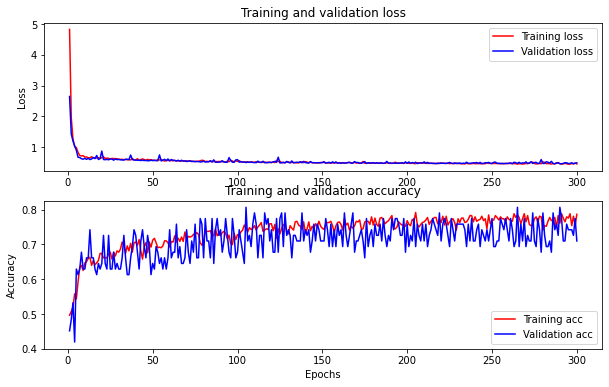

In [14]:
epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')